### Import all the requirements

In [2]:
import pandas as pd
from openpyxl import load_workbook
import glob
import seaborn as sns
%matplotlib inline

### Step1: Aggregate the sales data from multiple excel sheets

In [3]:
txtfiles = []

# Intention: Iterate over all the excel files in the sales data folder & create a combined dataframe
overall_sales_data_df = None
for make_level_sales_file in glob.glob("./sales-data/*.xlsx"):
    sales_data_dict = {}
    sales_data_df =None
    sheets = load_workbook(make_level_sales_file, read_only=True).sheetnames
    print(make_level_sales_file)
    # Step 1A: Iterate over all the sheets to get year-wise data for the make example: Hyundau - 2022, 2021 etc data
    for sheet in sheets:
        sales_data_dict[sheet] = pd.read_excel(open(make_level_sales_file,'rb'), sheet_name=sheet)
        if sales_data_df is None:
            sales_data_df = sales_data_dict[sheet]
        else:
            sales_data_df = pd.merge(sales_data_df, sales_data_dict[sheet], on=["Maker/Brand", "Group", "Type", "Model","Segment"])
    # Step 1B: Add this make level df to the overall sales df
    if overall_sales_data_df is None:
        overall_sales_data_df = sales_data_df
    else:
        overall_sales_data_df = pd.concat([overall_sales_data_df,sales_data_df])
    

./sales-data/Datsun_dataset.xlsx
./sales-data/Hyundai_dataset.xlsx
./sales-data/Suzuki_dataset.xlsx
./sales-data/Skoda_dataset.xlsx
./sales-data/Toyota_dataset.xlsx
./sales-data/Honda_dataset.xlsx
./sales-data/Mahindra_dataset.xlsx
./sales-data/VW_dataset.xlsx
./sales-data/Tata_dataset.xlsx
./sales-data/Renault_dataset.xlsx


In [4]:
overall_sales_data_df

,Group,Maker/Brand,Type,Segment,Model,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Renault-Nissan Alliance,Datsun,Cars,A,Redi-GO,757,1037,975,333,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Renault-Nissan Alliance,Datsun,Cars,B,Go,65,220,129,208,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Renault-Nissan Alliance,Datsun,UVs/MPVs,MPV,Go+,346,165,11,26,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Hyundai Kia Automotive Group,Hyundai,Cars,A,Grand i10,12387,11970,14120,12420,7509,...,11343.0,-,-,-,-,-,-,-,-,-
1,Hyundai Kia Automotive Group,Hyundai,Cars,B,Xcent,289,112,100,100,0,...,346.0,-,-,-,-,-,-,-,-,-
2,Hyundai Kia Automotive Group,Hyundai,Cars,B,i20,8673,8550,10653,5376,4032,...,5248.0,-,-,-,-,-,-,-,-,-
3,Hyundai Kia Automotive Group,Hyundai,Cars,C,Accent (Verna),4491,4519,4293,3661,2572,...,3789.0,-,-,-,-,-,-,-,-,-
4,Hyundai Kia Automotive Group,Hyundai,UVs/MPVs,SUV-C,Creta (ix25),14200,15602,16655,14938,8291,...,12402.0,-,-,-,-,-,-,-,-,-
5,Hyundai Kia Automotive Group,Hyundai,UVs/MPVs,SUV-C,Tucson (ix35),110,145,140,120,100,...,49.0,-,-,-,-,-,-,-,-,-
0,Suzuki,Suzuki,Cars,A,Alto,18719,18228,18390,18400,3684,...,8022.0,-,-,-,-,-,-,-,-,-


### Step 2: Popularity Index Calculation Based on the Sales Data

In [5]:
# Step 2.A: Using melt transposed the data to get Monthly level sales at Make-Model-Month level
overall_sales_data_df = overall_sales_data_df.melt(id_vars=["Group", "Maker/Brand","Type","Segment","Model"], 
        var_name="Month", 
        value_name="Sales")

In [6]:
# Step 2.B Remove Not Numeric records from Sales Data
overall_sales_data_df["Sales"] = overall_sales_data_df["Sales"].apply(lambda s: pd.to_numeric(s, errors='coerce'))
overall_sales_data_df = overall_sales_data_df[overall_sales_data_df["Sales"].notna()]

In [7]:
# Step 2.C: Create Monthly Segment Sales
overall_sales_data_df["Monthly_Segment_Sales"] = overall_sales_data_df["Sales"].groupby([overall_sales_data_df["Month"],overall_sales_data_df["Segment"]]).transform('sum')
overall_sales_data_df["Percentage_Contribution"] = (overall_sales_data_df["Sales"] /overall_sales_data_df["Monthly_Segment_Sales"])*100


In [8]:
overall_sales_data_df["Percentage_Contribution"]

0        1.055258
1        0.131329
2        1.321569
3       17.267481
4        0.583909
          ...    
2704    11.767510
2705     8.274293
2706     7.074137
2707    39.588165
2708     5.912672
Name: Percentage_Contribution, Length: 2685, dtype: float64

<AxesSubplot:>

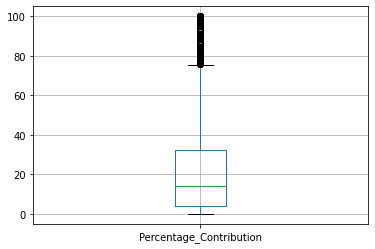

In [9]:
overall_sales_data_df.boxplot(column='Percentage_Contribution', return_type='axes')

In [11]:
overall_sales_data_df

,Group,Maker/Brand,Type,Segment,Model,Month,Sales,Monthly_Segment_Sales,Percentage_Contribution
0,Renault-Nissan Alliance,Datsun,Cars,A,Redi-GO,2021-01-01,757.0,71736.0,1.055258
1,Renault-Nissan Alliance,Datsun,Cars,B,Go,2021-01-01,65.0,49494.0,0.131329
2,Renault-Nissan Alliance,Datsun,UVs/MPVs,MPV,Go+,2021-01-01,346.0,26181.0,1.321569
3,Hyundai Kia Automotive Group,Hyundai,Cars,A,Grand i10,2021-01-01,12387.0,71736.0,17.267481
4,Hyundai Kia Automotive Group,Hyundai,Cars,B,Xcent,2021-01-01,289.0,49494.0,0.583909
...,...,...,...,...,...,...,...,...,...
2704,VW Group,VW,Cars,C,Vento,2022-03-01,3703.0,31468.0,11.767510
2705,Tata Group,Tata,Cars,A,Tiago,2022-03-01,4800.0,58011.0,8.274293
2706,Tata Group,Tata,Cars,B,Tigor,2022-03-01,3875.0,54777.0,7.074137
2707,Tata Group,Tata,UVs/MPVs,SUV-B,Nexon,2022-03-01,14169.0,35791.0,39.588165


In [12]:
overall_sales_data_df.to_csv("Percentage_Contribution.csv")

In [28]:
data1 = pd.read_csv('Percentage_Contribution.csv')
data2 = pd.read_csv('cars_ds_final_2021.csv')
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on=['Model','Maker/Brand'], 
                   how='left')
output1

,Unnamed: 0_x,Group,Maker/Brand,Type_x,Segment,Model,Month,Sales,Monthly_Segment_Sales,Percentage_Contribution,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Unnamed: 141
0,0,Renault-Nissan Alliance,Datsun,Cars,A,Redi-GO,2021-01-01,757,71736,1.055258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Renault-Nissan Alliance,Datsun,Cars,B,Go,2021-01-01,65,49494,0.131329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Renault-Nissan Alliance,Datsun,Cars,B,Go,2021-01-01,65,49494,0.131329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Renault-Nissan Alliance,Datsun,Cars,B,Go,2021-01-01,65,49494,0.131329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Renault-Nissan Alliance,Datsun,Cars,B,Go,2021-01-01,65,49494,0.131329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2708,Renault-Nissan Alliance,Renault,Cars,A,Kwid,2022-03-01,3430,58011,5.912672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8637,2708,Renault-Nissan Alliance,Renault,Cars,A,Kwid,2022-03-01,3430,58011,5.912672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8638,2708,Renault-Nissan Alliance,Renault,Cars,A,Kwid,2022-03-01,3430,58011,5.912672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8639,2708,Renault-Nissan Alliance,Renault,Cars,A,Kwid,2022-03-01,3430,58011,5.912672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
output1.drop('Unnamed: 141', inplace=True, axis=1)

In [37]:
list_of_column_names = list(output1.columns)
list_of_column_names

AttributeError: 'DataFrame' object has no attribute 'rows'

In [36]:
output1.to_csv("final1.csv")

In [ ]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.boxplot(x="Segment", y="Percentage_Contribution", data=overall_sales_data_df);

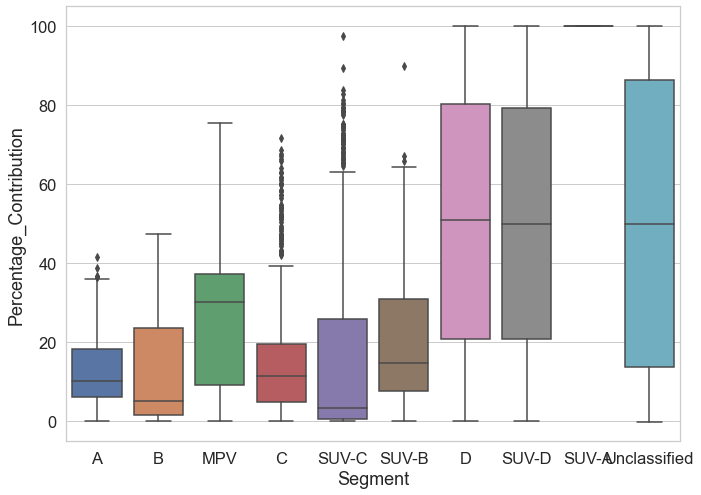

In [39]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.boxplot(x="Segment", y="Percentage_Contribution", data=overall_sales_data_df);

In [27]:
df = overall_sales_data_df[overall_sales_data_df["Segment"] == 'SUV-D']
df

TypeError: string indices must be integers

In [ ]:
data.drop('year', inplace=True, axis=1)

In [29]:
df [df["Percentage_Contribution"] >70.0]

,Group,Maker/Brand,Type,Segment,Model,Month,Sales,Monthly_Segment_Sales,Percentage_Contribution
34,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-01-01,7666.0,8930.0,85.845465
77,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-02-01,6751.0,8843.0,76.342870
120,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-03-01,7220.0,9357.0,77.161483
163,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-04-01,6110.0,7472.0,81.771949
206,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-05-01,4434.0,4434.0,100.000000
249,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-06-01,8037.0,8597.0,93.486100
292,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-07-01,7753.0,9729.0,79.689588
421,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2021-10-01,4205.0,5899.0,71.283268
550,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2020-01-01,7289.0,7567.0,96.326153
593,Mahindra & Mahindra,Mahindra & Mahindra,UVs/MPVs,SUV-D,Bolero,2020-02-01,3643.0,5116.0,71.207975


In [30]:
df [df["Percentage_Contribution"] <20.0]

,Group,Maker/Brand,Type,Segment,Model,Month,Sales,Monthly_Segment_Sales,Percentage_Contribution
25,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2021-01-01,1264.0,8930.0,14.154535
154,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2021-04-01,1362.0,7472.0,18.228051
197,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2021-05-01,0.0,4434.0,0.000000
240,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2021-06-01,560.0,8597.0,6.513900
541,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-01-01,278.0,7567.0,3.673847
713,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-05-01,158.0,1359.0,11.626196
756,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-06-01,688.0,4141.0,16.614344
799,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-07-01,836.0,5041.0,16.584011
842,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-08-01,683.0,6068.0,11.255768
885,Toyota Group,Toyota,UVs/MPVs,SUV-D,Fortuner,2020-09-01,1107.0,6823.0,16.224535
